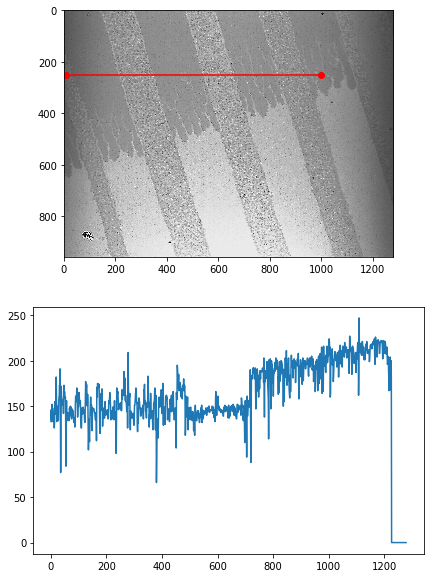

In [11]:
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
#-- Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
img1 = cv2.imread("C:/Users/0408h/Documents/Python Scripts/gfc test.bmp",0)

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 10, 250 # These are in _pixel_ coordinates!!
x1, y1 = 1000, 250
num = 1280
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(figsize=(7,10),nrows=2)
axes[0].imshow(img1, cmap='gray')
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

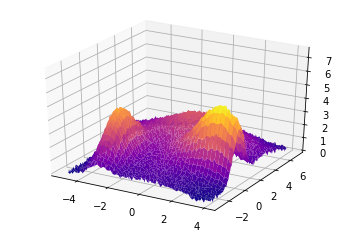

Fitted parameters:
[ 2.47165087e-03  2.01517236e+00  2.52837715e+00  5.42061506e+00
  1.50034156e+00 -1.01294210e+00  3.99783341e+00  5.98761202e+00
  2.49409800e+00  1.79079883e+00 -2.99968337e+00 -4.99995139e-01
 -9.97488724e-01  1.99692789e+00  3.99157871e+00  3.00393780e+00
  5.01962516e-01  2.00050080e+00  1.00263933e+00  4.98312726e+00]
RMS residual = 0.10048148878837974


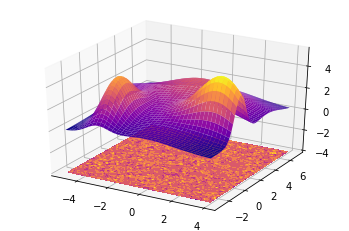

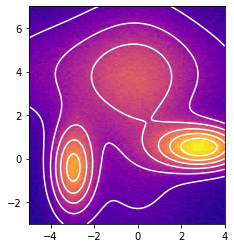

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
xmin, xmax, nx = -5, 4, 75
ymin, ymax, ny = -3, 7, 150
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

# A list of the Gaussian parameters: x0, y0, xalpha, yalpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
noise_sigma = 0.1

# The function to be fit is Z.
Z = np.zeros(X.shape)
for p in gprms:
    Z += gaussian(X, Y, *p)
Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_zlim(0,np.max(Z)+2)
plt.show()

# This is the callable that is passed to curve_fit. M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def _gaussian(M, *args):
    x, y = M
    arr = np.zeros(x.shape)
    for i in range(len(args)//5):
       arr += gaussian(x, y, *args[i*5:i*5+5])
    return arr

# Initial guesses to the fit parameters.
guess_prms = [(0, 0, 1, 1, 2),
              (-1.5, 5, 5, 1, 3),
              (-4, -1, 1.5, 1.5, 6),
              (4, 1, 1.5, 1.5, 6.5)
             ]
# Flatten the initial guess parameter list.
p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((X.ravel(), Y.ravel()))
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(_gaussian, xdata, Z.ravel(), p0)
fit = np.zeros(Z.shape)
for i in range(len(popt)//5):
    fit += gaussian(X, Y, *popt[i*5:i*5+5])
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((Z - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
cset = ax.contourf(X, Y, Z-fit, zdir='z', offset=-4, cmap='plasma')
ax.set_zlim(-4,np.max(fit))
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(Z, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(X, Y, fit, colors='w')
plt.show()

In [1]:
import cv2
import numpy as np

img = cv2.imread("C:/Users/0408h/Documents/Python Scripts/gfc test.bmp",1)
##  -1の場合RGBA、0の場合RGB、1の場合グレースケール

cv2.imshow(img)

TypeError: imshow() missing required argument 'mat' (pos 2)

In [29]:
import numpy as np
for i in range(1280):
ary = np.array(i)
print(ary)

IndentationError: expected an indented block (<ipython-input-29-48b9eba18492>, line 3)

In [40]:
import numpy as np
a = np.arange(1280)
print (a)

[   0    1    2 ... 1277 1278 1279]


In [137]:
arr = np.arange(10)
a = (np.tile(arr, (5,1)))
print(a)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [131]:
arr2 = np.arange(10)
b = (np.repeat(arr2[:, None], 10, axis=1))
print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


In [136]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import bisplrep, bisplev

arr = np.arange(1280)#０～（カッコの中の数字）の配列ができる
a = (np.tile(arr, (980,1)))
print(a)

arr2 = np.arange(1280) #０～（カッコの中の数字）の配列ができる
b = (np.repeat(arr2[:, None], 980, axis=1)) #[]の次が配列の繰り返し回数
print(b)

img = cv2.imread('siro.jpg',0)
im = np.array(img)
print(im)

x = np.linspace(0, 1280, 100)
y = np.linspace(0, 980, 100)
tck = bisplrep(a,b,im, kx=3, ky=2)
zz = bisplev(x, y, tck)
 
xx, yy = np.meshgrid(x, y)
 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*d.T)
ax.plot_surface(xx, yy, zz)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

[[   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 ...
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1277 1277 1277 ... 1277 1277 1277]
 [1278 1278 1278 ... 1278 1278 1278]
 [1279 1279 1279 ... 1279 1279 1279]]
[[109  98 105 ...  94  92  91]
 [106 102  98 ...  91  92  97]
 [104 104  99 ...  90  94  91]
 ...
 [115 120 110 ... 101 106 106]
 [120 120 121 ... 102 111 104]
 [113 120 113 ... 106 102 103]]


TypeError: len(x)==len(y)==len(z) must hold.

In [143]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import bisplrep, bisplev

arr = np.arange(1280)#０～（カッコの中の数字）の配列ができる
a = (np.tile(arr, (960,1)))
print(a)

arr2 = np.arange(1280) #０～（カッコの中の数字）の配列ができる
b = (np.repeat(arr2[:, None], 960, axis=1)) #[]の次が配列の繰り返し回数
print(b)

img = cv2.imread('siro.jpg',0)
im = np.array(img)
print(im)

x = np.linspace(0, 1280, 100)
y = np.linspace(0, 960, 100)
tck = bisplrep(a,b,im, kx=3, ky=2)
zz = bisplev(x, y, tck)
 
xx, yy = np.meshgrid(x, y)
 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*d.T)
ax.plot_surface(xx, yy, zz)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

[[   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 ...
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1277 1277 1277 ... 1277 1277 1277]
 [1278 1278 1278 ... 1278 1278 1278]
 [1279 1279 1279 ... 1279 1279 1279]]
[[109  98 105 ...  94  92  91]
 [106 102  98 ...  91  92  97]
 [104 104  99 ...  90  94  91]
 ...
 [115 120 110 ... 101 106 106]
 [120 120 121 ... 102 111 104]
 [113 120 113 ... 106 102 103]]


OverflowError: Too many data points to interpolate

In [3]:
from scipy.interpolate import bisplrep, bisplev
 
x = np.linspace(16, 22, 100)
y = np.linspace(8, 15, 100)
tck = bisplrep(d[:, 0], d[:, 1], d[:, 2], kx=3, ky=2)
zz = bisplev(x, y, tck)
 
xx, yy = np.meshgrid(x, y)
 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*d.T)
ax.plot_surface(xx, yy, zz)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

NameError: name 'd' is not defined

In [2]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8],[9,10]])

c = np.concatenate((a.T,b), axis = 0) 
print(c)

[[ 1  4]
 [ 2  5]
 [ 3  6]
 [ 7  8]
 [ 9 10]]


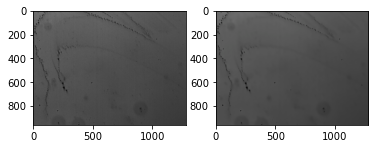

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/wadat/Python/NiCO2O4/-0_b.bmp')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/wadat/Python/picture/siro.jpg',0)
dst = cv2.fastNlMeansDenoising(img,None,10,7,21)

plt.figure(figsize=(8,6))
plt.imshow(dst)

# 画像の配列への変換
import PIL.Image
im = np.array(dst)

# 3Dプロットする際のグラフの規格指定
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(len(im[0]))
y = np.arange(len(im))
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
fig = ax.plot_surface(X, Y, np.array(im))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider
import numpy as np

x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)
Z = X*X + 2 * Y*Y

# Figureの設定
fig = plt.figure(figsize=(5,5))

# Figureの中に３Dグラフ、Slider用のAxesを追加
axcolor = 'gold'
gs = fig.add_gridspec(20, 20)
ax1 = fig.add_subplot(gs[:17,:], projection='3d')
ax_slider_z = fig.add_subplot(gs[18,:], facecolor=axcolor)
ax_slider_xy = fig.add_subplot(gs[19,:], facecolor=axcolor)

# Sliderの設定
z0 = 0
xy0 = 0
delta = 10
slider_z = Slider(ax_slider_z, 'z-axis', -180, 180, valinit=z0, valstep=delta)
slider_xy = Slider(ax_slider_xy, 'xy-axis', -180, 180, valinit=xy0, valstep=delta)

# 3Dグラフの見る方向の初期値を設定
ax1.view_init(elev=z0, azim=xy0)

# 3Dグラフを表示
ax1.plot_surface(X, Y, Z)

# Sliderを動かした時に呼ばれるコールバック関数
def view_change(val):

    sz = slider_z.val
    sxy = slider_xy.val
    ax1.view_init(elev=sxy, azim=sz)
    fig.canvas.draw_idle()    
    
    slider_z.on_changed(view_change)
slider_xy.on_changed(view_change)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
import numpy as np
import cv2

img = cv2.imread("C:/Users/wadat/Python/picture/siro.jpg",0)
mask = cv2.imread("C:/Users/wadat/Python/picture/siro.jpg",0)

dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 膨張・収縮処理
img = cv2.imread("C:/Users/wadat/Python/picture/siro.jpg")
# 近傍の定義
neiborhood = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],
             np.uint8)
# 収縮
img_erode = cv2.erode(img,neiborhood,iterations=10)
# 膨張
img_dilate = cv2.dilate(img_erode,neiborhood,iterations=10)

plt.imshow(img_erode)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

In [6]:
import cv2

if __name__ == '__main__':

    # 画像の読み込み
    img_src = cv2.imread("C:/Users/wadat/Pictures/NiCo2O4/201120_4/-0_b.bmp", cv2.IMREAD_COLOR)

    # フィルタ実行前画像の表示
    cv2.imshow('frame',img_src)

    # フィルタの実行
    ksize=21 # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
    im_mask = cv2.medianBlur(img_src,ksize)

    # フィルタ実行後画像の表示
    cv2.imshow('frame_mask',im_mask)

    # 実行後画像の書き込み
    median_path = './diff_mask.jpg'
    cv2.imwrite(median_path,im_mask)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [19]:
# best-fit quadratic curve (2nd-order)
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

NameError: name 'data' is not defined

In [9]:
%matplotlib widget
%matplotlib inline

In [10]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [11]:
# Create data with x and y random over [-2, 2], and z a Gaussian function of x and y.
np.random.seed(12345)
x = 2 * (np.random.random(500) - 0.5)
y = 2 * (np.random.random(500) - 0.5)

def f(x, y):
    return np.exp(-(x + y ** 2))

z = f(x, y)

data = np.c_[x,y,z]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X.flatten()
YY = Y.flatten()
    
# best-fit linear plane (1st-order)
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]
    
# or expressed using matrix/vector product
#Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

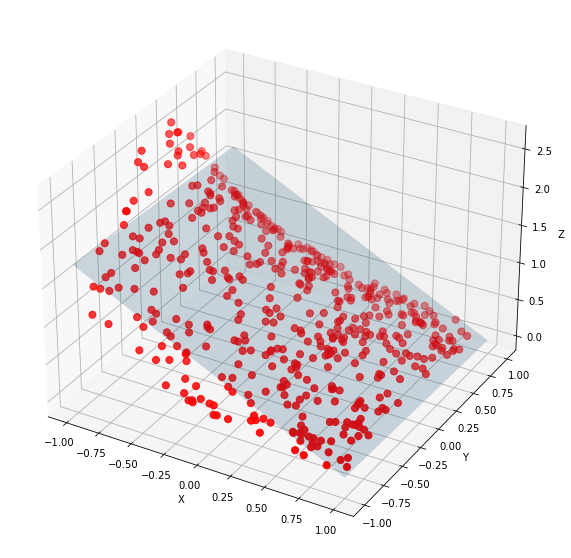

In [12]:
# plot points and fitted surface using Matplotlib
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

# plot points and fitted surface using Plotly
trace1 = go.Scatter3d(
    x=data[:,0],
    y=data[:,1],
    z=data[:,2],
    mode='markers',
    marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.8)
)

trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.999)

# Package the trace dictionary into a data object
data_test1 = go.Data([trace1, trace2])

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = go.Layout(
    title='1st-order (linear) plane', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test1, layout=layout)

# Send to Plotly and show in notebook
py.iplot(fig, filename='test1')

In [13]:

# best-fit quadratic curve (2nd-order)
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

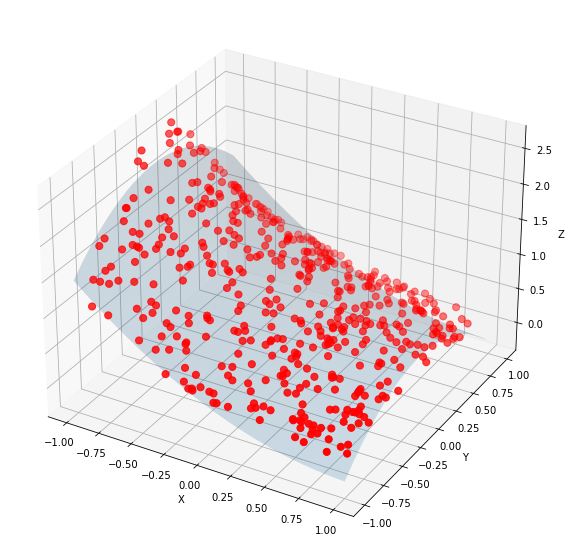

In [14]:
# plot points and fitted surface using Matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

# plot points and fitted surface using Plotly
trace3 = go.Surface(
    z=Z,  
    x=X, 
    y=Y,
    colorscale='RdBu',
    opacity=0.999
)

# Package the trace dictionary into a data object
data_test2 = go.Data([trace1, trace3])

# Make a layout object
layout = go.Layout(
    title='2nd-order (quadratic) surface', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test2, layout=layout)

# Send to Plotly and show in notebook
py.iplot(fig, filename='test2')

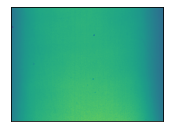

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/wadat/Python/picture/siro.jpg',0)


plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.show()

C:/Users/wadat/Python/picture/siro.jpg


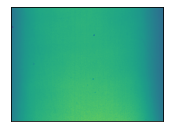

In [3]:
#置換フィールド{}に入れる文字列をformat()で指定します。
a="C:/Users/wadat/Python/picture/{}.jpg"
b="siro"
print(a.format(b))


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(a.format(b),0)

plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.show()

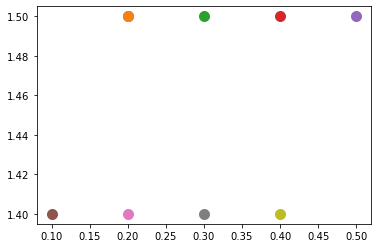

In [4]:

plt.plot(0.2, 1.5, marker='.', markersize=20) 
plt.plot(0.2, 1.5, marker='.', markersize=20)
plt.plot(0.3, 1.5, marker='.', markersize=20) 
plt.plot(0.4, 1.5, marker='.', markersize=20) 
plt.plot(0.5, 1.5, marker='.', markersize=20)
plt.plot(0.1, 1.4, marker='.', markersize=20)
plt.plot(0.2, 1.4, marker='.', markersize=20)
plt.plot(0.3, 1.4, marker='.', markersize=20) 
plt.plot(0.4, 1.4, marker='.', markersize=20)

In [9]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Scale')

# Frame
frame = ttk.Frame(root, padding=10)
frame.grid(sticky=(N, W, S, E))

# スケールの作成
val = DoubleVar()
sc = ttk.Scale(
    frame,
    variable=val,
    orient=HORIZONTAL,
    length=200,
    from_=0,
    to=255,
    command=lambda e: print('val:%4d' % val.get()))
sc.grid(row=0, column=0, sticky=(N, E, S, W))

# Button
button1 = ttk.Button(
    frame,
    text='OK',
    command=lambda: print('val:%4d' % val.get()))
button1.grid(row=0, column=1, padx=5, sticky=(E))

root.mainloop()

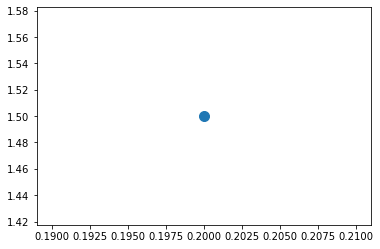

In [5]:
plt.plot(0.2, 1.5, marker='.', markersize=20) 

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

img_1 = Image.open("C:/Users/wadat/Desktop/GFC_TRmoke21/18.jpg")
np.mean (img_1)


90.47141666666667

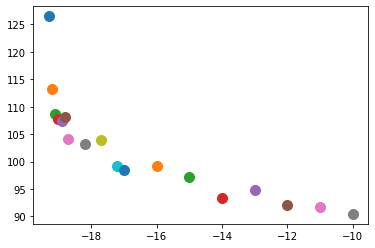

In [107]:
plt.plot(-19.3, 126.49, marker='.', markersize=20) 
plt.plot(-19.2, 113.19, marker='.', markersize=20) 
plt.plot(-19.1, 108.63, marker='.', markersize=20) 
plt.plot(-19.0, 107.76, marker='.', markersize=20) 
plt.plot(-18.9, 107.35, marker='.', markersize=20) 
plt.plot(-18.8, 108.22, marker='.', markersize=20) 
plt.plot(-18.7, 104.13, marker='.', markersize=20) 
plt.plot(-18.2, 103.21, marker='.', markersize=20) 
plt.plot(-17.7, 103.93, marker='.', markersize=20) 
plt.plot(-17.2, 99.29, marker='.', markersize=20) 
plt.plot(-17.0, 98.48, marker='.', markersize=20) 
plt.plot(-16.0, 99.21, marker='.', markersize=20) 
plt.plot(-15.0, 97.19, marker='.', markersize=20) 
plt.plot(-14.0, 93.45, marker='.', markersize=20) 
plt.plot(-13, 94.75, marker='.', markersize=20) 
plt.plot(-12, 92.09, marker='.', markersize=20) 
plt.plot(-11, 91.67, marker='.', markersize=20) 
plt.plot(-10, 90.47, marker='.', markersize=20) 


In [85]:
import cv2

# 画像読み込み
img = cv2.imread("C:/Users/wadat/Desktop/GFC_TRmoke21/11.bmp")

# img[top : bottom, left : right]
# サンプル1の切り出し、保存
img1 = img[300 : 700, 300: 750]
cv2.imwrite("C:/Users/wadat/Desktop/GFC_TRmoke21/39.jpg", img1)

True

In [112]:
import cv2
import glob
import os
import shutil
import time
from datetime import datetime

### もろもろの初期設定

date = datetime.now().strftime("%Y%m%d_%H%M%S")
if not os.path.exists(date):
    os.mkdir(date)   # 画像保存用のフォルダ作製

# とりあえずwaiting_time秒待ってから撮影をスタートさせる
capture_interval = 0.5 # 画像取得間隔（秒）
waiting_time = 1
print('Recording will be started in {0} seconds'.format(waiting_time))
time.sleep(waiting_time)
print('Start')

### 画像の撮影
def capture():
    cap = cv2.VideoCapture(0) # 任意のカメラ番号に変更する。1台だけならカメラ番号は0。
    while True: # capture_interval秒ごとに画像の読み込みおよび保存を行う。
        ret, frame = cap.read() # カメラからキャプチャされた画像をframeとして読み込む
        cv2.imshow("camera", frame) # frameを画面に表示。なぜかこいつを残しておかないとenterで操作を止められない。
        k = cv2.waitKey(1)&0xff # キー入力を待つ。引数は入力待ち時間。
        # カレントディレクトリ内にある「img」フォルダに「(date).jpg」というファイル名でファイルを保存
        date_time = datetime.now().strftime("%Y%m%d%H%M%S")
        path = "./{0}/".format(date) + date_time + ".jpg"
        cv2.imwrite(path, frame) # 画像をフォルダへ保存

        # エンターキーを押したら撮影終了
        if k == 13:
            break 
        time.sleep(capture_interval)
    cap.release()
    cv2.destroyAllWindows()

Recording will be started in 1 seconds
Start


In [111]:
import time
    starttime = time.time()
    wait = delay
    while True:
        ret, frame = cap.read()
        cv2.imshow(window_name, frame)
        key = cv2.waitKey(wait) & 0xFF
        if key == ord('q'):
            break
        endtime = time.time()
        elapse = int((endtime - starttime) * 1000)
        if elapse < wait:
            # 他のキーで抜けてきた場合はタイムアウト時間を補正
            wait -= elapse
        else:
            cv2.imwrite('{}_{}.{}'.format(base_path, n, ext), frame)
            n += 1
            starttime = time.time()
            wait = delay

IndentationError: unexpected indent (<ipython-input-111-ead4841f59a5>, line 2)

In [115]:
import cv2
import os
import datetime

def save_frame_camera_cycle(device_num, dir_path, basename, cycle, ext='jpg', delay=1, window_name='frame'):
cap = cv2.VideoCapture(device_num)
    if not cap.isOpened():
    return

   os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    n = 0
    while True:
        #retは画像取得成功フラグ        ret, frame = cap.read()
        frame = cv2.resize(frame, dsize=(1920,1080)) #FHDサイズに指定。captの後でいいのかな？
        cv2.imshow(window_name, frame)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
        if n == cycle:
            n = 0
            cv2.imwrite('{}_{}.{}'.format(base_path, datetime.datetime.now().strftime('%Y%m%d%H%M%S%f'), ext), frame)
        n += 1

    cv2.destroyWindow(window_name)

if __name__ == "__main__":
   # 30フレームで1秒を60回繰り返した後の画像保存（最初の1週は保存されないので注意）
   save_frame_camera_cycle(0, 'data/temp', 'camera_capture_cycle', 30*60)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [8]:
import glob
import os

from PIL import Image

### 設定
img_dir = 'C:/Users/wadat/Pictures/GFC_TRmoke21'  # 入力ディレクトリ
out_dir = 'C:/Users/wadat/Desktop/GFC_TRmoke23'  # 出力ディレクトリ
crop_range = 50, 50, 100, 100  # 左上 x、左上y、右下x、右下y

# 指定したフォルダの画像ファイルの一覧を取得する。
types = ['*.png', '*.jpg', '*.jpeg', '*.bmp']
paths = []
for t in types:
    paths.extend(glob.glob(os.path.join(img_dir, t)))

os.makedirs(out_dir, exist_ok=True)
for p in paths:
    img = Image.open(p)  # 読み込む。
    resized = img.crop(crop_range)  # リサイズする。

    out_path = os.path.join(out_dir, os.path.basename(p))
    resized.save(out_path)

In [14]:
import glob

files = glob.glob("U:/skyrmion/210202/22.3/45/*.png")
for file in files:
    print(file)

U:/skyrmion/210202/22.3/45\20210203_133636.png
U:/skyrmion/210202/22.3/45\20210203_133642.png
U:/skyrmion/210202/22.3/45\20210203_133648.png
U:/skyrmion/210202/22.3/45\20210203_133654.png
U:/skyrmion/210202/22.3/45\20210203_133659.png
U:/skyrmion/210202/22.3/45\20210203_133705.png
U:/skyrmion/210202/22.3/45\20210203_133711.png
U:/skyrmion/210202/22.3/45\20210203_133717.png
U:/skyrmion/210202/22.3/45\20210203_133722.png
U:/skyrmion/210202/22.3/45\20210203_133728.png
U:/skyrmion/210202/22.3/45\20210203_133734.png
U:/skyrmion/210202/22.3/45\20210203_133740.png
U:/skyrmion/210202/22.3/45\20210203_133746.png
U:/skyrmion/210202/22.3/45\20210203_133751.png
U:/skyrmion/210202/22.3/45\20210203_133757.png
U:/skyrmion/210202/22.3/45\20210203_133803.png
U:/skyrmion/210202/22.3/45\20210203_133809.png
U:/skyrmion/210202/22.3/45\20210203_133814.png
U:/skyrmion/210202/22.3/45\20210203_133820.png
U:/skyrmion/210202/22.3/45\20210203_133826.png
U:/skyrmion/210202/22.3/45\20210203_133832.png
U:/skyrmion/2

In [13]:
#コード04
import numpy as np
for x in np.arange(0.00, 15.00, 0.200):
    print(x)

0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8
2.0
2.2
2.4000000000000004
2.6
2.8000000000000003
3.0
3.2
3.4000000000000004
3.6
3.8000000000000003
4.0
4.2
4.4
4.6000000000000005
4.800000000000001
5.0
5.2
5.4
5.6000000000000005
5.800000000000001
6.0
6.2
6.4
6.6000000000000005
6.800000000000001
7.0
7.2
7.4
7.6000000000000005
7.800000000000001
8.0
8.200000000000001
8.4
8.6
8.8
9.0
9.200000000000001
9.4
9.600000000000001
9.8
10.0
10.200000000000001
10.4
10.600000000000001
10.8
11.0
11.200000000000001
11.4
11.600000000000001
11.8
12.0
12.200000000000001
12.4
12.600000000000001
12.8
13.0
13.200000000000001
13.4
13.600000000000001
13.8
14.0
14.200000000000001
14.4
14.600000000000001
14.8


In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob

files = glob.glob("U:/skyrmion/210202/22.3/45/*.png")
for file in files:
    img = Image.open(file)
    mean = np.mean (img)
    print(mean)

167.523720703125
178.31163411458334
178.58204752604166
176.22113606770833
176.797705078125
180.691748046875
177.95595703125
174.79474609375
160.57578776041666
160.08017252604168
162.71295572916668
163.45259765625
174.61450846354165
172.4578515625
171.22293619791665
160.63743489583334
162.11638671875
156.26964518229167
155.23297200520832
163.33335286458333
167.83462239583332
156.33615559895833
158.54654622395833
155.35423502604166
155.298212890625
155.280869140625
156.78634114583335
156.66328125
157.07217447916668
170.01542643229166
156.65686197916668
157.16780598958334
168.144052734375
155.38192057291667
155.15334635416667
155.42947265625
155.286962890625
157.90248372395834
168.14118815104166
154.77309244791667
154.86561848958334
154.97121419270835
153.946630859375
154.65201171875
157.28548828125
154.51098958333333
154.36115885416666
154.90393880208333
154.63953776041666
156.80954752604165
168.400986328125
173.97656575520833
173.53430013020832
174.236806640625
173.6344921875
173.175465

In [52]:
#コード04
import numpy as np
for x in np.linspace(0, 15)
    print(x)

SyntaxError: invalid syntax (<ipython-input-52-1003569f69cd>, line 3)

In [20]:
print([i / 10 for i in range(0, 150, 2)])

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0, 11.2, 11.4, 11.6, 11.8, 12.0, 12.2, 12.4, 12.6, 12.8, 13.0, 13.2, 13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14.8]


In [1]:
sudo apt-get install telnetd

SyntaxError: invalid syntax (<ipython-input-1-3ccc667b81d5>, line 1)

In [2]:
import telnetlib

In [5]:
import telnetlib

HOST = "localhost"
user = input("Enter your remote account: ")
password = getpass.getpass()

tn = telnetlib.Telnet(HOST)

tn.read_until(b"login: ")
tn.write(user.encode('ascii') + b"\n")
if password:
    tn.read_until(b"Password: ")
    tn.write(password.encode('ascii') + b"\n")

tn.write(b"ls\n")
tn.write(b"exit\n")

print(tn.read_all().decode('ascii'))

Enter your remote account:  wadatiken**


NameError: name 'getpass' is not defined

In [8]:
# -*- coding:utf-8 -*-
import getpass
import sys
import telnetlib

HOST = "150.12.70.32"

tn = telnetlib.Telnet(HOST)

tn.read_until("login: ")
tn.write(user + "\n")
if password:
    tn.read_until("Password: ")
    tn.write(password + "\n")

tn.read_until('~$ ') # コマンドを実行する直前まで読み飛ばす
tn.write("ls\n")
result = tn.read_until('~$ ') # lsコマンド結果とゴミを格納
tn.write("exit\n")

tL = result.split("\n")[1:-1] # コマンドとプロンプトを削除
for line in tL:
    print(line)

ConnectionRefusedError: [WinError 10061] 対象のコンピューターによって拒否されたため、接続できませんでした。

In [1]:
pip install pings

  Created wheel for pings: filename=pings-0.0.1-py3-none-any.whl size=5429 sha256=eedb0d479330eeb766998b4d61218a492bb53c4a65df4271c6a34d43d2d3cfb4
  Stored in directory: c:\users\wadat\appdata\local\pip\cache\wheels\29\47\3b\183ba688d1d628b4c7d0627a47571620db00fd3b941284432d
Successfully built pings
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pings

p = pings.Ping() # Pingオブジェクト作成
res = p.ping("google.com")  # googleを監視

if res.is_reached():
  # 監視対象への接続ができた
  do_something()
else:
  # 監視対象への接続ができなかった
  do_something()

AttributeError: module 'time' has no attribute 'clock'

In [3]:
import subprocess
from ctypes import windll
hosts = ["150.12.70.32"]
while True:
    for host in hosts:
        result = subprocess.run(["ping.exe", host, "-n", "1"], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
        num = result.returncode
        if num == 1:
            user32 = windll.user32
            user32.MessageBoxW(0, "error", host, 0x00000040)
            break
    if num == 1:
        break

KeyboardInterrupt: 

In [4]:
ping 150.12.70.32

SyntaxError: invalid syntax (<ipython-input-4-6e55a377b422>, line 1)

In [5]:
import subprocess

print("=" * 60)
print("PING OKの場合")
print("=" * 60)
commands = ["ping", "-n", "2", "-w", "1000", "150.12.70.32"]
print(" ".join(commands))
proc = subprocess.run(
    commands,
    stdout=subprocess.PIPE,     # 標準出力は保存
    stderr=subprocess.DEVNULL   # 標準エラーは捨てる
)
print(f"return code : {proc.returncode}")
result = proc.stdout.decode("cp932")
print(result)
print()


print("=" * 60)
print("PING NGの場合")
print("=" * 60)
commands = ["ping", "-n", "2", "-w", "1000", "192.168.10.2"]
print(" ".join(commands))
proc = subprocess.run(
    commands,
    stdout=subprocess.PIPE,     # 標準出力は保存
    stderr=subprocess.DEVNULL   # 標準エラーは捨てる
)
print(f"return code : {proc.returncode}")
result = proc.stdout.decode("cp932")
print(result)
print()

PING OKの場合
ping -n 2 -w 1000 150.12.70.32
return code : 0

150.12.70.32 に ping を送信しています 32 バイトのデータ:
150.12.70.32 からの応答: バイト数 =32 時間 =1ms TTL=64
150.12.70.32 からの応答: バイト数 =32 時間 =2ms TTL=64

150.12.70.32 の ping 統計:
    パケット数: 送信 = 2、受信 = 2、損失 = 0 (0% の損失)、
ラウンド トリップの概算時間 (ミリ秒):
    最小 = 1ms、最大 = 2ms、平均 = 1ms


PING NGの場合
ping -n 2 -w 1000 192.168.10.2
return code : 1

192.168.10.2 に ping を送信しています 32 バイトのデータ:
要求がタイムアウトしました。
要求がタイムアウトしました。

192.168.10.2 の ping 統計:
    パケット数: 送信 = 2、受信 = 0、損失 = 2 (100% の損失)、


